In [27]:
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm


import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

# from plotcm import plot_confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from IPython.display import display, clear_output
import pandas as pd
import time
import json

from itertools import product
from collections import namedtuple
from collections import OrderedDict
import pdb

In [2]:
data = np.array([1, 2, 3])
type(data)

numpy.ndarray

In [3]:
o1 = torch.Tensor(data)
o2 = torch.tensor(data)
o3 = torch.as_tensor(data)
o4 = torch.from_numpy(data)

In [16]:
print(o1)
print(o2)
print(o3)
print(o4)

tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([1, 2, 3])
tensor([1, 2, 3])


The difference here arises in the fact that the torch.Tensor() constructor uses the default dtype when building the tensor.

In [17]:
print(o1.dtype)
print(o2.dtype)
print(o3.dtype)
print(o4.dtype)

torch.float32
torch.int64
torch.int64
torch.int64


In [18]:
o1.dtype == torch.get_default_dtype()

True

In [19]:
torch.tensor(data, dtype=torch.float32)
torch.as_tensor(data, dtype=torch.float32)

tensor([1., 2., 3.])

`torch.Tensor()` and `torch.tensor()` copy their input data while `torch.as_tensor()` and `torch.from_numpy()` share their input data in memory with the original input object. Sharing data is more efficient and uses less memory than copying data because the data is not written to two locations in memory.

In [20]:
print("old:", data)
data[0] = 0
print("new:", data)

print(o1)
print(o2)
print(o3)
print(o4)

old: [1 2 3]
new: [0 2 3]
tensor([1., 2., 3.])
tensor([1, 2, 3])
tensor([0, 2, 3])
tensor([0, 2, 3])


In [21]:
print(o3.numpy())

[0 2 3]


The torch.from_numpy() function only accepts numpy.ndarrays, while the torch.as_tensor() function accepts a wide variety of array-like objects including other PyTorch tensors. For this reason, torch.as_tensor() is the winning choice in the memory sharing game.

Given all of these details, these two are the best options:

- `torch.tensor()`
- `torch.as_tensor()`

The `torch.tensor()` call is the sort of go-to call, while `torch.as_tensor()` should be employed when tuning our code for performance.

- Since numpy.ndarray objects are allocated on the CPU, the as_tensor() function must copy the data from the CPU to the GPU when a GPU is being used.

- The memory sharing of as_tensor() doesn't work with built-in Python data structures like lists.

- The as_tensor() call requires developer knowledge of the sharing feature. This is necessary so we don't inadvertently make an unwanted change in the underlying data without realizing the change impacts multiple objects.

- The as_tensor() performance improvement will be greater if there are a lot of back and forth operations between numpy.ndarray objects and tensor objects. However, if there is just a single load operation, there shouldn't be much impact from a performance perspective.

## Tensor Operation Types

- Reshaping operations
- Element-wise operations
- Reduction operations
- Access operations

#### Reshaping Operations For Tensors

In [22]:
t = torch.tensor([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]], dtype=torch.float32)

In [23]:
t.size()

torch.Size([3, 4])

In [24]:
t.shape

torch.Size([3, 4])

In [25]:
# rank of a tensor

In [26]:
len(t.shape)

2

In [27]:
# number of elements contained within the tensor

In [28]:
torch.tensor(t.shape).prod(), t.numel()

(tensor(12), 12)

In [29]:
t

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])

In [30]:
t.reshape([1, 12])

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])

In [31]:
t.reshape(6, 2)

tensor([[1., 1.],
        [1., 1.],
        [2., 2.],
        [2., 2.],
        [3., 3.],
        [3., 3.]])

In [32]:
t.reshape(6, 2)

tensor([[1., 1.],
        [1., 1.],
        [2., 2.],
        [2., 2.],
        [3., 3.],
        [3., 3.]])

In [33]:
t.reshape(12, 1)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [3.]])

In [34]:
t.view(12, 1)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [3.]])

In [35]:
t.reshape(2, 2, 3)

tensor([[[1., 1., 1.],
         [1., 2., 2.]],

        [[2., 2., 3.],
         [3., 3., 3.]]])

In [36]:
t.view(2, 2, 3)

tensor([[[1., 1., 1.],
         [1., 2., 2.]],

        [[2., 2., 3.],
         [3., 3., 3.]]])

Squeezing a tensor removes the dimensions or axes that have a length of one.

Unsqueezing a tensor adds a dimension with a length of one.

These functions allow us to expand or shrink the rank (number of dimensions) of our tensor.

In [37]:
t.reshape([1, 12]) == t.reshape(1, 12)

tensor([[True, True, True, True, True, True, True, True, True, True, True, True]])

In [38]:
print(t.reshape([1, 12]))
print(t.reshape([1, 12]).shape)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


In [39]:
print(t.reshape([1, 12]).squeeze())

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])


In [40]:
print(t.reshape([1, 12]).squeeze().shape)

torch.Size([12])


In [41]:
print(t.reshape([1, 12]).squeeze().unsqueeze(dim=0))

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])


In [42]:
print(t.reshape([1, 12]).squeeze().unsqueeze(dim=0).shape)

torch.Size([1, 12])


In [43]:
t.reshape([1, 12]).unsqueeze(dim=-1).shape

torch.Size([1, 12, 1])

In [44]:
def flatten(t):
    t = t.reshape(1, -1)
    t = t.squeeze()
    return t

In [45]:
t = torch.arange(12).reshape(4, 3)

In [46]:
flatten(t)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [47]:
t.reshape(1, -1).squeeze()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [48]:
t1 = torch.tensor([[1, 2], [3, 4]])
t2 = torch.tensor([[5, 6], [7, 8]])

In [49]:
torch.cat((t1, t2), dim=0)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [50]:
torch.cat((t1, t2), dim=1)

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

In [51]:
t1 = torch.tensor([[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]])

t2 = torch.tensor([[2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2]])

t3 = torch.tensor([[3, 3, 3, 3], [3, 3, 3, 3], [3, 3, 3, 3], [3, 3, 3, 3]])

In [52]:
t = torch.stack((t1, t2, t3))

In [53]:
t.shape

torch.Size([3, 4, 4])

In [54]:
t

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])

In [55]:
t = t.reshape(3, 1, 4, 4)

In [56]:
t

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [57]:
t.shape

torch.Size([3, 1, 4, 4])

In [58]:
t.unsqueeze(dim=1).shape

torch.Size([3, 1, 1, 4, 4])

In [59]:
t[0].shape

torch.Size([1, 4, 4])

In [60]:
t[0][0]

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

In [61]:
# whole flatten
print(t.reshape(1, -1)[0])  # Thank you Mick!

print(t.reshape(-1))  # Thank you Aamir!

print(t.view(t.numel()))  # Thank you Ulm!

print(t.flatten())  # Thank you PyTorch!

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])


In [62]:
## Flattening Specific Axes Of A Tensor

t.flatten(start_dim=1).shape

torch.Size([3, 16])

In [63]:
t.flatten(start_dim=1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [64]:
t.flatten(start_dim=2).shape

torch.Size([3, 1, 16])

In [65]:
## Flattening An RGB Image
r = torch.ones(1, 2, 2)
g = torch.ones(1, 2, 2) + 1
b = torch.ones(1, 2, 2) + 2

img = torch.cat((r, g, b), dim=0)

In [66]:
img.shape

torch.Size([3, 2, 2])

In [67]:
img.flatten(start_dim=0)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

## Element-wise operations

In [68]:
t1 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)

t2 = torch.tensor([[9, 8], [7, 6]], dtype=torch.float32)

In [69]:
print(t1 + 2)


print(t1 - 2)

print(t1 * 2)


print(t1 / 2)

tensor([[3., 4.],
        [5., 6.]])
tensor([[-1.,  0.],
        [ 1.,  2.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


In [70]:
print(t1.add(2))

print(t1.sub(2))

print(t1.mul(2))

print(t1.div(2))

tensor([[3., 4.],
        [5., 6.]])
tensor([[-1.,  0.],
        [ 1.,  2.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


#### Broadcasting

In [71]:
t1 = torch.tensor([[1, 1], [1, 1]], dtype=torch.float32)

t2 = torch.tensor([2, 4], dtype=torch.float32)

In [72]:
# t1 + t2 ???????

print(t1.shape)

print(t2.shape)

torch.Size([2, 2])
torch.Size([2])


In [73]:
np.broadcast_to(t2.numpy(), t1.shape)

array([[2., 4.],
       [2., 4.]], dtype=float32)

In [74]:
torch.tensor([1, 2, 3]) < torch.tensor([3, 1, 2])

tensor([ True, False, False])

In [75]:
t = torch.tensor([[0, 5, 0], [6, 0, 7], [0, 8, 0]], dtype=torch.float32)

In [76]:
print(t.eq(0))
print(t.ge(0))
print(t.gt(0))
print(t.lt(0))
print(t.le(7))

tensor([[ True, False,  True],
        [False,  True, False],
        [ True, False,  True]])
tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])
tensor([[False,  True, False],
        [ True, False,  True],
        [False,  True, False]])
tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])
tensor([[ True,  True,  True],
        [ True,  True,  True],
        [ True, False,  True]])


In [77]:
t.neg()

tensor([[-0., -5., -0.],
        [-6., -0., -7.],
        [-0., -8., -0.]])

In [78]:
# 10:50	20:49: 10
# 10:59	17:18: 06
# 10:56	18:51: 08
# 11:05	19:46: 08
# 11:25	19:58: 09
# 10:57	19:11: 08
# 11:26	19:03: 08
# 10:31	18:57: 08
# 10:42	18:3:  08
# 10:53	18:56: 08
# 10:59	19:45: 08
# 10:57	20:11: 09
# 10:52	17:31: 06
# 11:00	19:09: 08

In [79]:
# sum([10,
# 6,
# 8,
# 8,
# 9,
# 8,
# 8,
# 8,
# 8,
# 8,
# 8,
# 9,
# 6,
# 8])

In [80]:
(31 - 8) * 8

184

In [81]:
14 * 8

112

### Tensor Reduction Operations

In [82]:
t = torch.tensor([[0, 1, 0], [2, 0, 2], [0, 3, 0]], dtype=torch.float32)

In [83]:
t.sum()

tensor(8.)

In [84]:
t.numel()

9

In [85]:
t.sum()
t.prod()
t.mean()
t.std()

tensor(1.1667)

In [86]:
t = torch.tensor([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]], dtype=torch.float32)

In [87]:
t.sum(dim=0)

tensor([6., 6., 6., 6.])

In [88]:
t.sum(dim=1)

tensor([ 4.,  8., 12.])

In [89]:
t = torch.tensor([[1, 0, 0, 2], [0, 3, 3, 0], [4, 0, 0, 5]], dtype=torch.float32)

In [90]:
t.max()

tensor(5.)

In [91]:
t.argmax(dim=0)

tensor([2, 1, 1, 2])

In [92]:
t.argmax(dim=1)

tensor([3, 1, 3])

In [93]:
t.argmax()

tensor(11)

In [94]:
t.flatten()

tensor([1., 0., 0., 2., 0., 3., 3., 0., 4., 0., 0., 5.])

In [95]:
t.max(dim=0).indices == t.argmax(dim=0)

tensor([True, True, True, True])

In [96]:
t.max(dim=0)

torch.return_types.max(
values=tensor([4., 3., 3., 5.]),
indices=tensor([2, 1, 1, 2]))

In [97]:
t.max(dim=1)

torch.return_types.max(
values=tensor([2., 3., 5.]),
indices=tensor([3, 1, 3]))

In [98]:
## Accessing Elements Inside Tensors

In [99]:
t = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float32)

In [100]:
t.mean()

tensor(5.)

In [101]:
# If we want to actually get the value as a number,
# we use the item() tensor method. This works for scalar valued tensors.
t.mean().item()

5.0

In [102]:
# When we compute the mean across the first axis, multiple values are returned, and we can access the numeric values
# by transforming the output tensor into a Python list or a NumPy array.

In [103]:
t.mean(dim=0).tolist()

[4.0, 5.0, 6.0]

In [104]:
t.mean(dim=0).numpy()

array([4., 5., 6.], dtype=float32)

In [105]:
# !pip install torchvision

All subclasses of the Dataset class must override __len__, that provides the size of the dataset, and __getitem__, supporting integer indexing in range from 0 to len(self) exclusive.

In [106]:
train_set = torchvision.datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()]),
)

In [107]:
# DataLoader wrapper for our training set
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1000, shuffle=True)

In [108]:
len(train_set)

60000

In [109]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [110]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [111]:
sample = next(iter(train_set))

In [112]:
image, label = sample

In [113]:
type(image)

torch.Tensor

In [114]:
type(label)

int

In [115]:
image.shape

torch.Size([1, 28, 28])

In [116]:
torch.tensor(label).shape

torch.Size([])

In [117]:
image.squeeze().shape

torch.Size([28, 28])

tensor(9)

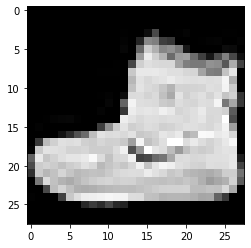

In [118]:
plt.imshow(image.squeeze(), cmap="gray")
torch.tensor(label)

## PyTorch DataLoader: Working With Batches Of Data


In [119]:
display_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

In [120]:
# note that each batch will be different when shuffle=True
batch = next(iter(display_loader))

In [121]:
images, labels = batch

In [122]:
print("types:", type(images), type(labels))

types: <class 'torch.Tensor'> <class 'torch.Tensor'>


In [123]:
print("shapes:", images.shape, labels.shape)

shapes: torch.Size([10, 1, 28, 28]) torch.Size([10])


In [124]:
# To plot a batch of images, we can use the torchvision.utils.make_grid()
# function to create a grid that can be plotted like so:

grid = torchvision.utils.make_grid(images, nrow=10)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


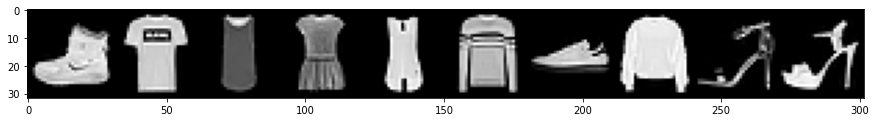

In [125]:
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels:", labels)

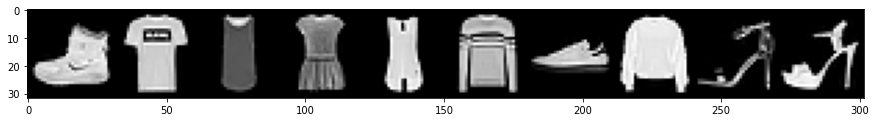

In [126]:
plt.figure(figsize=(15, 15))
plt.imshow(grid.permute(1, 2, 0))

In [127]:
print("labels:", labels)

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


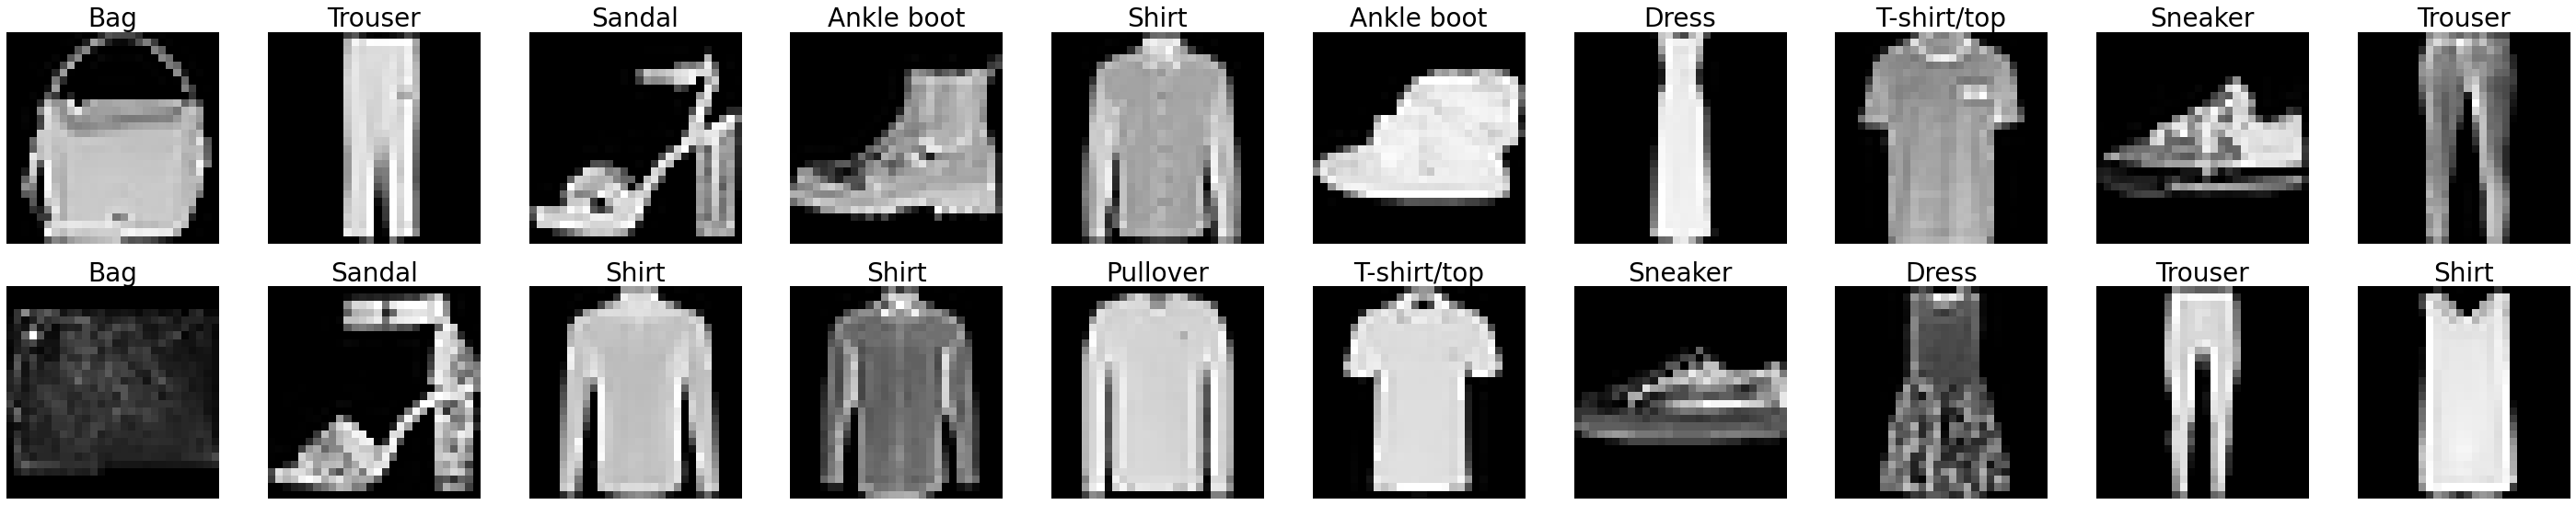

In [128]:
how_many_to_plot = 20

train_loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=True)

plt.figure(figsize=(50, 50))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10, 10, i)
    plt.imshow(image.reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.title(train_set.classes[label.item()], fontsize=28)
    if i >= how_many_to_plot:
        break
plt.show()

In [129]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # implement the forward pass
        return t

In [130]:
network = Network()

In [131]:
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [132]:
print(network.conv1)

print(network.conv2)

print(network.fc1)

print(network.fc2)

print(network.out)

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
Linear(in_features=192, out_features=120, bias=True)
Linear(in_features=120, out_features=60, bias=True)
Linear(in_features=60, out_features=10, bias=True)


In [133]:
## Accessing The Layer Weights

In [134]:
network.conv1.weight

Parameter containing:
tensor([[[[-0.1909, -0.1017, -0.0476,  0.0725,  0.0227],
          [-0.1012,  0.1256,  0.0312,  0.1446,  0.0880],
          [-0.0618, -0.1320, -0.1372,  0.0705,  0.0837],
          [-0.1153, -0.0431, -0.0826,  0.0975, -0.0583],
          [ 0.0577, -0.0133,  0.1886,  0.1585,  0.1494]]],


        [[[-0.1142,  0.0344,  0.1950,  0.1402,  0.0779],
          [-0.0488, -0.1839,  0.0866, -0.1206, -0.0063],
          [ 0.1582, -0.1524, -0.1237,  0.1361,  0.0643],
          [-0.1457, -0.1465, -0.0891,  0.1561, -0.0537],
          [-0.0862, -0.1667, -0.0416, -0.0777,  0.1938]]],


        [[[-0.1793,  0.0781,  0.1166, -0.1025,  0.0379],
          [ 0.0096,  0.0503,  0.0310, -0.1092,  0.1997],
          [-0.0531,  0.0045, -0.1201,  0.1479,  0.0914],
          [-0.0282,  0.0106,  0.0680,  0.0248, -0.0727],
          [ 0.0357,  0.1189,  0.0266, -0.1906,  0.1878]]],


        [[[ 0.1739,  0.0497, -0.0982,  0.1865, -0.0233],
          [ 0.1697,  0.0933,  0.1120, -0.0313, -0.1790

### PyTorch Parameter Class
To keep track of all the weight tensors inside the network. PyTorch has a special class called Parameter. The Parameter class extends the tensor class, and so the weight tensor inside every layer is an instance of this Parameter class.

In [135]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

The first axis has a length of 6, and this accounts for the 6 filters.
The second axis has a length of 1 which accounts for the single input channel, and the last two axes account for the height and width of the filter.

Now, the second conv layer has 12 filters, and instead of convolving a single input channel, there are 6 input channels coming from the previous layer.

Think of this value of 6 here as giving each of the filters some depth. Instead of having a filter that convolves all of the channels iteratively, our filter has a depth that matches the number of channels.

Our tensors are rank-4 tensors. 

The first axis represents the number of filters. 

The second axis represents the depth of each filter which corresponds to the number of input channels being convolved.
The last two axes represent the height and width of each filter. We can pull out any single filter by indexing into the weight tensor's first axis.

(Number of filters, Depth, Height, Width)

### Fully connected 

Here we can see that each of our linear layers have a rank-2 weight tensor. The pattern that we can see here is that the height of the weight tensor has the length of the desired output features and a width of the input features.

In [136]:
print(network.fc1.weight.shape)
print(network.fc2.weight.shape)
print(network.out.weight.shape)

torch.Size([120, 192])
torch.Size([60, 120])
torch.Size([10, 60])


In [137]:
# Accessing The Networks Parameters
for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [138]:
for name, param in network.named_parameters():
    print(name, "\t", param.shape)

conv1.weight 	 torch.Size([6, 1, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([12, 6, 5, 5])
conv2.bias 	 torch.Size([12])
fc1.weight 	 torch.Size([120, 192])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([60, 120])
fc2.bias 	 torch.Size([60])
out.weight 	 torch.Size([10, 60])
out.bias 	 torch.Size([10])


In [139]:
in_features = torch.tensor([1, 2, 3, 4], dtype=torch.float32)

weight_matrix = torch.tensor(
    [[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6]], dtype=torch.float32
)

In [140]:
weight_matrix.matmul(in_features)

tensor([30., 40., 50.])

In [141]:
# Transform Using A PyTorch Linear Layer
fc = nn.Linear(in_features=4, out_features=3, bias=False)

In [142]:
fc

Linear(in_features=4, out_features=3, bias=False)

In [143]:
fc(in_features)

tensor([-2.1183, -3.3006, -0.9406], grad_fn=<SqueezeBackward3>)

In [144]:
fc.weight = nn.Parameter(weight_matrix)

In [145]:
fc(in_features)

tensor([30., 40., 50.], grad_fn=<SqueezeBackward3>)

When want to call the forward() method of a nn.Module instance, we call the actual instance instead of calling the forward() method directly.

 
Instead of doing this `self.conv1.forward(tensor)`, we do this `self.conv1(tensor)`. Make sure you see the previous post in this series to see all the details on this.

In [2]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        # t = F.softmax(t, dim=1)

        return t

However, what makes a layer distinct from an operation is that layers have weights. Since pooling operations and activation functions do not have weights, we will refer to them as operations and view them as being added to the collection of layer operations.

Inside the network we usually use relu() as our non-linear activation function, but for the output layer, whenever we have a single category that we are trying to predict, we use softmax(). The softmax function returns a positive probability for each of the prediction classes, and the probabilities sum to 1.

However, in our case, we won't use softmax() because the loss function that we'll use, `F.cross_entropy()`, **implicitly performs the softmax() operation on its input**, so we'll just return the result of the last linear transformation.

Since we are not training the network yet, we aren't planning on updating the weights, and so we don't require gradient calculations. We will turn this back on when training begins.


 
This process of tracking calculations happens in real-time, as the calculations occur. Remember back at the beginning of the series, we said that PyTorch uses a dynamic computational graph. We'll now we're turning it off.

Turning it off isn't strictly necessary but having the feature turned off does reduce memory consumption since the graph isn't stored in memory. This code will turn the feature off.

In [147]:
torch.set_grad_enabled(False)

In [148]:
# Passing A Single Image To The Network
network = Network()

In [149]:
sample = next(iter(train_set))
image, label = sample
image.shape

torch.Size([1, 28, 28])

In [150]:
# (batch_size, in_channels, height, width)

In [151]:
# Inserts an additional dimension that represents a batch of size 1
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [152]:
pred = network(
    image.unsqueeze(0)
)  # image shape needs to be (batch_size × in_channels × H × W)

In [153]:
pred

tensor([[ 0.1085, -0.0637,  0.0995,  0.0299,  0.0848,  0.1598, -0.0384,  0.1466,
          0.0938, -0.0147]])

In [154]:
# (batch size, number of prediction classes)
pred.shape, label

(torch.Size([1, 10]), 9)

In [155]:
pred.argmax(dim=1)

tensor([5])

If we wanted these values to be probabilities, we could just the softmax() function from the nn.functional package.

In [156]:
F.softmax(pred, dim=1)

tensor([[0.1046, 0.0881, 0.1037, 0.0967, 0.1022, 0.1101, 0.0903, 0.1087, 0.1031,
         0.0925]])

In [157]:
F.softmax(pred, dim=1).sum()

tensor(1.0000)

#### Neural Network Batch Processing - Pass Image Batch To PyTorch CNN

In [158]:
data_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

In [159]:
batch = next(iter(data_loader))
images, labels = batch

In [160]:
images.shape

torch.Size([10, 1, 28, 28])

In [161]:
preds = network(images)

In [162]:
preds.shape

torch.Size([10, 10])

In [163]:
# Using Argmax: Prediction Vs Label

In [164]:
preds.argmax(dim=1)

tensor([5, 5, 7, 7, 5, 5, 5, 5, 5, 5])

In [165]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [166]:
# compare it against the label tensor.
preds.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False, False, False, False,  True,  True])

In [167]:
preds.argmax(dim=1).eq(labels).sum()

tensor(2)

In [168]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [169]:
get_num_correct(preds, labels)

2

In [170]:
network.conv1.weight.shape
# (number of filters, number of input channels, filter height, filter width)

torch.Size([6, 1, 5, 5])

In [171]:
t.min().item()

1.0

In [172]:
t

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [173]:
t = F.relu(t)

In [174]:
t.min().item()

1.0

In [175]:
t.shape

torch.Size([3, 3])

In [176]:
t = torch.tensor(
    np.arange(1 * 6 * 24 * 24).reshape((1, 6, 24, 24)), dtype=torch.float32
)

In [177]:
t = F.max_pool2d(t, kernel_size=2, stride=2)

In [178]:
t.shape

torch.Size([1, 6, 12, 12])

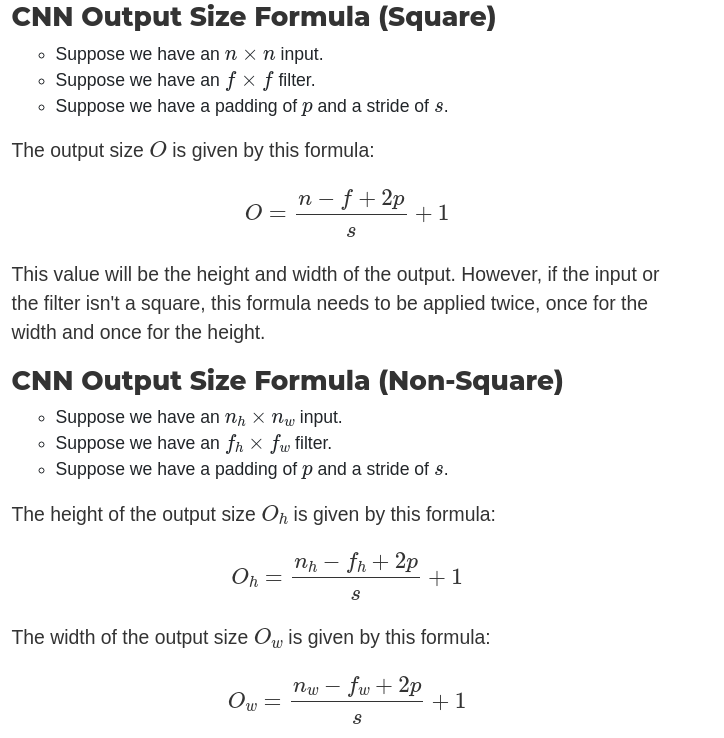

In [179]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [180]:
t.shape

torch.Size([1, 6, 12, 12])

In [181]:
t = network.conv2(t)

In [182]:
t.shape

torch.Size([1, 12, 8, 8])

In [183]:
print(t.min().item())

t = F.relu(t)
print(t.min().item())

-2726.00048828125
0.0


In [184]:
t = F.max_pool2d(t, kernel_size=2, stride=2)

In [185]:
t.shape

torch.Size([1, 12, 4, 4])

In [186]:
# Flatten
t = t.reshape(-1, 12 * 4 * 4)

In [187]:
t.shape

torch.Size([1, 192])

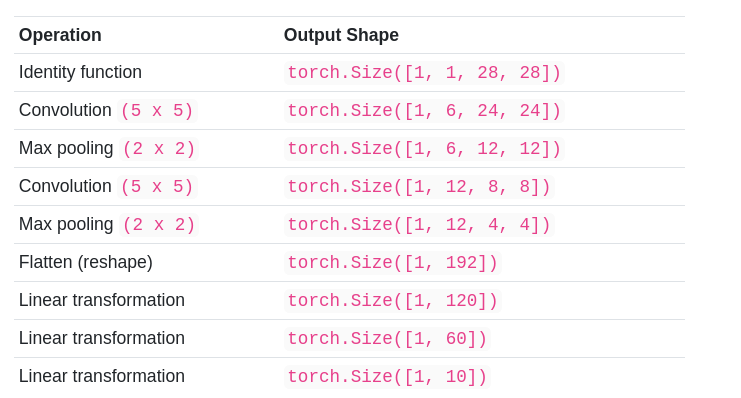

- Get batch from the training set.
- Pass batch to network.
- Calculate the loss (difference between the predicted values and the true values).
- Calculate the gradient of the loss function w.r.t the network's weights.
- Update the weights using the gradients to reduce the loss.
- Repeat steps 1-5 until one epoch is completed.
- Repeat steps 1-6 for as many epochs required to reach the minimum loss.

In [188]:
torch.set_grad_enabled(True)

In [189]:
network = Network()

In [190]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)

In [191]:
batch = next(iter(train_loader))  # Getting a batch
images, labels = batch

In [192]:
preds = network(images)
loss = F.cross_entropy(preds, labels)

In [193]:
loss.item()

2.310948610305786

In [184]:
get_num_correct(preds, labels)

14

#### Calculating The Gradients

PyTorch has created a computation graph under the hood. As our tensor flowed forward through our network, all of the computations where added to the graph. The computation graph is then used by PyTorch to calculate the gradients of the loss function with respect to the network's weights.

The gradients are tensors that are accessible in the `grad` (short for gradient) attribute of the weight tensor of each layer.

In [185]:
network.conv1.weight.grad

To calculate the gradients, we call the backward() method on the loss tensor

In [186]:
loss.backward()

In [187]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

#### Updating The Weights

In [188]:
optimizer = optim.Adam(network.parameters(), lr=0.01)
optimizer.step()  # Updating the weights

When the step() function is called, the optimizer updates the weights using the gradients that are stored in the network's parameters. This means that we should expect our loss to be reduced if we pass the same batch through the network again. Checking this, we can see that this is indeed the case:

In [189]:
preds = network(images)

In [190]:
loss = F.cross_entropy(preds, labels)

In [191]:
loss.item()

2.264094591140747

In [192]:
get_num_correct(preds, labels)

11

#### Train Using A Single Batch

In [193]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader))  # Get Batch
images, labels = batch

preds = network(images)  # Pass Batch
loss = F.cross_entropy(preds, labels)  # Calculate Loss

loss.backward()  # Calculate Gradients
optimizer.step()  # Update Weights

print("loss1:", loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print("loss2:", loss.item())

loss1: 2.3105978965759277
loss2: 2.2832818031311035


#### Training With All Batches (Single Epoch)

Finally, after we call the backward() method on our loss tensor, we know the gradients will be calculated and added to the grad attributes of our network's parameters. For this reason, we need to zero out these gradients. We can do this with a method called zero_grad() that comes with the optimizer.

Something to notice about these 600 iterations is that our weights will be updated 600 times by the end of the loop. If we raise the batch_size this number will go down and if we lower the batch_size this number will go up.

In [194]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_correct = 0

for batch in tqdm(train_loader):  # Get Batch
    images, labels = batch

    preds = network(images)  # Pass Batch
    loss = F.cross_entropy(preds, labels)  # Calculate Loss

    optimizer.zero_grad()
    loss.backward()  # Calculate Gradients
    optimizer.step()  # Update Weights

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

print("epoch:", 0, "total_correct:", total_correct, "loss:", total_loss)

100%|██████████| 600/600 [00:09<00:00, 63.20it/s]

epoch: 0 total_correct: 47412 loss: 334.8972020447254


In [195]:
total_correct / len(train_set)

0.7902

### Training With Multiple Epochs

In [196]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader:  # Get Batch
        images, labels = batch

        preds = network(images)  # Pass Batch
        loss = F.cross_entropy(preds, labels)  # Calculate Loss

        optimizer.zero_grad()
        loss.backward()  # Calculate Gradients
        optimizer.step()  # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print("epoch", epoch, "total_correct:", total_correct, "loss:", total_loss)

epoch 0 total_correct: 47475 loss: 329.668323546648
epoch 1 total_correct: 51516 loss: 230.51992259919643
epoch 2 total_correct: 52225 loss: 211.00270706415176
epoch 3 total_correct: 52646 loss: 199.54558616876602
epoch 4 total_correct: 52942 loss: 192.45746967941523
epoch 5 total_correct: 53081 loss: 188.13533276319504
epoch 6 total_correct: 53066 loss: 186.33738251775503
epoch 7 total_correct: 53239 loss: 183.02314087748528
epoch 8 total_correct: 53380 loss: 180.78315847367048
epoch 9 total_correct: 53396 loss: 181.28342693299055


In [197]:
network = Network()
optimizer = optim.Adam(network.parameters(), lr=0.01)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)

for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader:  # Get Batch
        images, labels = batch

        preds = network(images)  # Pass Batch
        loss = F.cross_entropy(preds, labels)  # Calculate Loss

        optimizer.zero_grad()
        loss.backward()  # Calculate Gradients
        optimizer.step()  # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print("epoch", epoch, "total_correct:", total_correct, "loss:", total_loss)

epoch 0 total_correct: 45903 loss: 368.3433122038841
epoch 1 total_correct: 51288 loss: 237.02998058497906
epoch 2 total_correct: 52031 loss: 218.1952141225338
epoch 3 total_correct: 52378 loss: 206.7265764027834
epoch 4 total_correct: 52475 loss: 203.21023562550545
epoch 5 total_correct: 52719 loss: 199.05801863968372
epoch 6 total_correct: 52769 loss: 195.01561230421066
epoch 7 total_correct: 53030 loss: 190.89160950481892
epoch 8 total_correct: 52965 loss: 191.96312250196934
epoch 9 total_correct: 53216 loss: 186.38281005620956


#### Get Predictions For The Entire Training Set

To get the predictions for all the training set samples, we need to pass all of the samples forward through the network. To do this, it is possible to create a DataLoader that has batch_size=1. This will pass a single batch to the network at once and will give us the desired prediction tensor for all the training set samples.

However, depending on the computing resources and the size of the training set if we were training on a different data set, we need a way to prediction on smaller batches and collect the results. To collect the results, we'll use the torch.cat() function to concatenate the output tensors together to obtain our single prediction tensor. Let's build a function to do this.

### Building A Function To Get Predictions For ALL Samples

The `@torch.no_grad()` PyTorch decoration. This is because we want this functions execution to omit gradient.
tracking. This is because gradient tracking uses memory, and during inference (getting predictions while not training) there is no need to keep track of the computational graph. The decoration is one way of locally turning off the gradient tracking feature while executing specific functions.

We specifically **need the gradient calculation feature anytime we are going to calculate gradients using the backward() function**. Otherwise, it is a good idea to turn it off because having it off will reduce memory consumption for computations, e.g. when we are using networks for predicting (inference).


We can disable gradient computations for specific or local spots in our code, e.g. like what we just saw with the annotated function. As another example, we can use Python's with context manger keyword to specify that a specify block of code should exclude gradient computations.

In [198]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat((all_preds, preds), dim=0)
    return all_preds

In [199]:
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_preds = get_all_preds(network, prediction_loader)

In [200]:
preds_correct = get_num_correct(train_preds, train_set.targets)

In [201]:
train_preds.shape

torch.Size([60000, 10])

In [202]:
print("total correct:", preds_correct)
print("accuracy:", preds_correct / len(train_set))

total correct: 53483
accuracy: 0.8913833333333333


### Building The Confusion Matrix

In [203]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [204]:
train_preds.argmax(dim=1)

tensor([9, 0, 3,  ..., 3, 0, 5])

if we compare the two tensors element-wise, we can see if the predicted label matches the target. Additionally, if we are counting the number of predicted labels vs the target labels, the values inside the two tensors act as coordinates for our matrix. Let's stack these two tensors along the second dimension so we can have 60,000 ordered pairs.

In [205]:
stacked = torch.stack((train_set.targets, train_preds.argmax(dim=1)), dim=1)

In [206]:
stacked.shape

torch.Size([60000, 2])

In [207]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 3],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [208]:
stacked[0].tolist()

[9, 9]

In [209]:
cmt = torch.zeros(10, 10, dtype=torch.int64)

In [210]:
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [211]:
for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1

In [212]:
cmt

tensor([[5176,   25,  107,  239,   32,    1,  350,    0,   68,    2],
        [   3, 5904,    4,   73,    6,    0,    3,    0,    7,    0],
        [  28,    3, 5192,   89,  464,    0,  200,    0,   24,    0],
        [  94,  100,   13, 5614,   96,    0,   62,    0,   19,    2],
        [   4,   11,  487,  353, 4884,    0,  210,    0,   49,    2],
        [   0,    0,    0,    0,    0, 5799,    0,   70,   12,  119],
        [ 945,    8,  653,  227,  598,    1, 3491,    0,   77,    0],
        [   0,    0,    0,    0,    0,  107,    0, 5745,    7,  141],
        [   5,    3,   21,   19,   28,   12,   31,    1, 5872,    8],
        [   0,    0,    0,    0,    0,   17,    2,  174,    1, 5806]])

In [213]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [214]:
cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))

In [215]:
print(type(cm))

<class 'numpy.ndarray'>


Confusion matrix, without normalization
[[5176   25  107  239   32    1  350    0   68    2]
 [   3 5904    4   73    6    0    3    0    7    0]
 [  28    3 5192   89  464    0  200    0   24    0]
 [  94  100   13 5614   96    0   62    0   19    2]
 [   4   11  487  353 4884    0  210    0   49    2]
 [   0    0    0    0    0 5799    0   70   12  119]
 [ 945    8  653  227  598    1 3491    0   77    0]
 [   0    0    0    0    0  107    0 5745    7  141]
 [   5    3   21   19   28   12   31    1 5872    8]
 [   0    0    0    0    0   17    2  174    1 5806]]


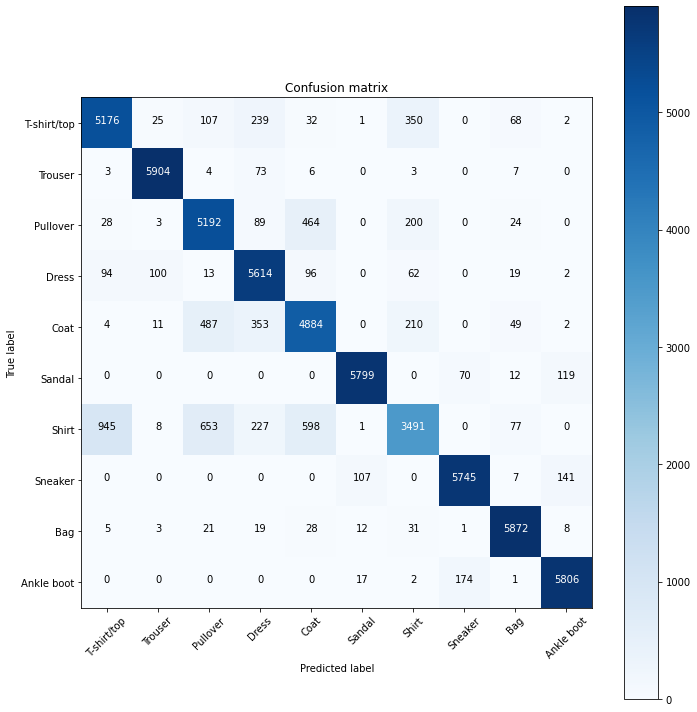

In [216]:
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, train_set.classes)

The difference between stacking and concatenating tensors can be described in a single sentence, so here goes.

Concatenating joins a sequence of tensors along an **existing axis**, and **stacking** joins a sequence of tensors along a new axis.
Another way of saying that we stack is to say that we create a new axis and then concat on that axis.

### How To Add Or Insert An Axis Into A Tensor

In [223]:
t1 = torch.tensor([1, 1, 1])

In [224]:
t1.unsqueeze(dim=0)

tensor([[1, 1, 1]])

In [226]:
t1.unsqueeze(dim=0).shape

torch.Size([1, 3])

In [228]:
t1.unsqueeze(dim=1).shape

torch.Size([3, 1])

In [229]:
print(t1.shape)
print(t1.unsqueeze(dim=0).shape)
print(t1.unsqueeze(dim=1).shape)

torch.Size([3])
torch.Size([1, 3])
torch.Size([3, 1])


When we concat, we are joining a sequence of tensors along an existing axis. This means that we are extending the length of an existing axis.

When we stack, we are creating a new axis that didn't exist before and this happens across all the tensors in our sequence, and then we concat along this new sequence.

In [230]:
t1 = torch.tensor([1, 1, 1])
t2 = torch.tensor([2, 2, 2])
t3 = torch.tensor([3, 3, 3])

In [236]:
torch.cat((t1, t2, t3), dim=0)

tensor([1, 1, 1, 2, 2, 2, 3, 3, 3])

let's stack these tensors along a new axis that we'll insert. We'll insert an axis at the first index. Note that this insertion will be happening implicitly under the hood by the stack function.

In [237]:
torch.stack((t1, t2, t3), dim=0)

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])

In [241]:
torch.stack((t1, t2, t3), dim=0).shape

torch.Size([3, 3])

Note that we cannot concat this sequence of tensors along the second axis because there currently is no second axis in existence, so in this case, stacking is our only option.

Let's try stacking along the second axis.

In [238]:
torch.stack((t1, t2, t3), dim=1)

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

Note that we can also insert the new axis explicitly, and preform the concatenation directly.

In [240]:
torch.cat((t1.unsqueeze(0), t2.unsqueeze(0), t3.unsqueeze(0)), dim=0)

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])

In [242]:
torch.cat((t1.unsqueeze(1), t2.unsqueeze(1), t3.unsqueeze(1)), dim=1)

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

In [243]:
t1.unsqueeze(1)

tensor([[1],
        [1],
        [1]])

In [245]:
## Stack Vs Concat In TensorFlow

The difference with this TensorFlow code opposed to the PyTorch call is that the cat() function is now called concat(). Additionally, we use the expand_dims() function to add an axis opposed to the unsqueeze() function.

In [2]:
import tensorflow as tf

t1 = tf.constant([1, 1, 1])
t2 = tf.constant([2, 2, 2])
t3 = tf.constant([3, 3, 3])

In [3]:
tf.concat((t1, t2, t3), axis=0)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 1, 1, 2, 2, 2, 3, 3, 3], dtype=int32)>

In [4]:
tf.stack((t1, t2, t3), axis=0)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]], dtype=int32)>

In [5]:
tf.concat((tf.expand_dims(t1, 0), tf.expand_dims(t2, 0), tf.expand_dims(t3, 0)), axis=0)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]], dtype=int32)>

In [6]:
tf.stack((t1, t2, t3), axis=1)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]], dtype=int32)>

In [7]:
tf.concat((tf.expand_dims(t1, 1), tf.expand_dims(t2, 1), tf.expand_dims(t3, 1)), axis=1)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]], dtype=int32)>

In [252]:
## Stack Vs Concatenate In NumPy

In [253]:
import numpy as np

t1 = np.array([1, 1, 1])
t2 = np.array([2, 2, 2])
t3 = np.array([3, 3, 3])

In [254]:
np.concatenate((t1, t2, t3), axis=0)

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [255]:
np.stack((t1, t2, t3), axis=0)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [256]:
np.concatenate(
    (np.expand_dims(t1, 0), np.expand_dims(t2, 0), np.expand_dims(t3, 0)), axis=0
)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [257]:
np.stack((t1, t2, t3), axis=1)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [258]:
np.concatenate(
    (np.expand_dims(t1, 1), np.expand_dims(t2, 1), np.expand_dims(t3, 1)), axis=1
)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

#### Stack Or Concat: Real-Life Examples

In [194]:
## Joining Images Into A Single Batch

We have three individual images as tensors. Each image tensor has three dimensions, a channel axis, a height axis, a width axis. Note that each of these tensors are separate from one another. Now, assume that our task is to join these tensors together to form a single batch tensor of three images.

Do we concat or do we stack?

Well, notice that in this example, there are only three dimensions in existence, and for a batch, we need four dimensions. This means that the answer is to stack the tensors along a new axis. This new axis will be the batch axis. This will give us a single tensor with four dimensions by adding one for the batch.

Note that if we join these three along any of the existing dimensions, we would be messing up either the channels, the height, or the width. We don't want to mess our data up like that.

In [195]:
t1 = torch.zeros(3, 28, 28)
t2 = torch.zeros(3, 28, 28)
t3 = torch.zeros(3, 28, 28)

In [196]:
torch.stack((t1, t2, t3), dim=0).shape

torch.Size([3, 3, 28, 28])

In [197]:
## Joining Batches Into A Single Batch

Now, suppose we have the same three images as before, but this time the images already have a dimension for the batch. This actually means we have three batches of size one. Assume that it is our task to obtain a single batch of three images.

Do we concat or stack?

Well, notice how there is an existing dimension that we can concat on. This means that we concat these along the batch dimension. In this case there is no need to stack.

In [264]:
t1 = torch.zeros(1, 3, 28, 28)
t2 = torch.zeros(1, 3, 28, 28)
t3 = torch.zeros(1, 3, 28, 28)

In [265]:
torch.cat((t1, t2, t3), dim=0).shape

torch.Size([3, 3, 28, 28])

In [266]:
## Joining Images With An Existing Batch

Suppose we have the same three separate image tensors. Only, this time, we already have a batch tensor. Assume our task is to join these three separate images with the batch.

Do we concat or do we stack?

Well, notice how the batch axis already exists inside the batch tensor. However, for the images, there is no batch axis in existence. This means neither of these will work. To join with stack or cat, we need the tensors to have matching shapes. So then, are we stuck? Is this impossible?

It is indeed possible. It's actually a very common task. The answer is to first stack and then to concat.

We first stack the three image tensors with respect to the first dimension. This creates a new batch dimension of length three. Then, we can concat this new tensor with the batch tensor.

In [267]:
batch = torch.zeros(3, 3, 28, 28)
t1 = torch.zeros(3, 28, 28)
t2 = torch.zeros(3, 28, 28)
t3 = torch.zeros(3, 28, 28)

In [268]:
torch.cat((batch, torch.stack((t1, t2, t3), dim=0)), dim=0).shape

torch.Size([6, 3, 28, 28])

In [269]:
batch = torch.zeros(3, 3, 28, 28)
t1 = torch.zeros(3, 28, 28)
t2 = torch.zeros(3, 28, 28)
t3 = torch.zeros(3, 28, 28)

torch.cat((batch, t1.unsqueeze(0), t2.unsqueeze(0), t3.unsqueeze(0)), dim=0).shape

torch.Size([6, 3, 28, 28])

In [8]:
## Installing TensorBoard For PyTorch

As of PyTorch version 1.1.0, PyTorch has added a tensorboard utility package that enables us to use TensorBoard with PyTorch.

In [9]:
print(torch.__version__)

1.7.1+cu101


In [10]:
from torch.utils.tensorboard import SummaryWriter

In [11]:
!tensorboard --version

2021-05-18 11:47:22.120466: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-05-18 11:47:22.120494: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2.5.0


In [ ]:
# !pip install tensorboard

## Network Graph And Training Set Images

The SummaryWriter class comes with a bunch of method that we can call to selectively pick and choose which data we want to be available to TensorBoard. We'll start by first by passing our network and a batch of images to the writer.

In [198]:
tb = SummaryWriter()

network = Network()
images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb.add_image("images", grid)
tb.add_graph(network, images)
tb.close()

The next import types of data we can add to TensorBoard is numerical data. We can add scalar values that will be displayed over time or over epoch. We can also add values to histograms to see frequency distributions of values.

In [200]:
# tb.add_scalar('Loss', total_loss, epoch)
# tb.add_scalar('Number Correct', total_correct, epoch)
# tb.add_scalar('Accuracy', total_correct / len(train_set), epoch)

# tb.add_histogram('conv1.bias', network.conv1.bias, epoch)
# tb.add_histogram('conv1.weight', network.conv1.weight, epoch)
# tb.add_histogram('conv1.weight.grad', network.conv1.weight.grad, epoch)

In [202]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb = SummaryWriter()
tb.add_image('images', grid)
tb.add_graph(network, images)

for epoch in range(1):

    total_loss = 0
    total_correct = 0

    for batch in train_loader:  # Get Batch

        # Pass Batch
        # Calculate Loss
        # Calculate Gradient
        # Update Weights

    tb.add_scalar('Loss', total_loss, epoch)
    tb.add_scalar('Number Correct', total_correct, epoch)
    tb.add_scalar('Accuracy', total_correct / len(train_set), epoch)

    tb.add_histogram('conv1.bias', network.conv1.bias, epoch)
    tb.add_histogram('conv1.weight', network.conv1.weight, epoch)
    tb.add_histogram(
        'conv1.weight.grad', network.conv1.weight.grad, epoch
    )

    print(
        "epoch", epoch,
        "total_correct:", total_correct,
        "loss:", total_loss
    )

tb.close()

IndentationError: expected an indented block (<ipython-input-202-5507bd0a7ba0>, line 24)

In [203]:
## Naming The Training Runs For TensorBoard

To uniquely identify each run, we can either set the file name of the run directly, or pass a comment string to the constructor that will be appended to the auto-generated file name.

In [204]:
## Choosing A Name For The Run

In [205]:
# batch_size, lr = 0.1
tb = SummaryWriter(comment=f" batch_size={batch_size} lr={lr}")

NameError: name 'batch_size' is not defined

In [206]:
# For example, imagine this SQL query:

# SELECT * FROM TBL_RUNS WHERE lr = 0.0

In [207]:
batch_size = 100
lr = 0.01

network = Network()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
optimizer = optim.Adam(network.parameters(), lr=lr)

In [208]:
tb = SummaryWriter(comment=f" batch_size={batch_size} lr={lr}")

In [209]:
## Calculate Loss With Different Batch Sizes

Since we'll be varying our batch sizes now, we'll need to make a change to the way we are calculating and accumulating the loss. Instead of just summing the loss returned by the loss function. We'll adjust it to account for the batch size.

total_loss += loss.item() * batch_size


Why do this? We'll the cross_entropy loss function averages the loss values that are produced by the batch and then returns this average loss. This is why we need to account for the batch size.

There is a parameter that the cross_entropy function accepts called reduction that we could also use.

The reduction parameter optionally accepts a string as an argument. This parameter specifies the reduction to apply to the output of the loss function.
'none' - no reduction will be applied.
'mean' - the sum of the output will be divided by the number of elements in the output.
'sum' - the output will be summed.
Note that the default is 'mean'. This is why loss.item() * batch_size works.

In [214]:
## Adding Network Parameters & Gradients To TensorBoard

In [210]:
batch_size_list = [100, 1000, 10000]
lr_list = [0.01, 0.001, 0.0001, 0.00001]

In [213]:
for batch_size in batch_size_list:
    for lr in lr_list:
        print(f"batch_size={batch_size}, lr={lr}")
        network = Network()

        train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
        optimizer = optim.Adam(network.parameters(), lr=lr)

        images, labels = next(iter(train_loader))
        grid = torchvision.utils.make_grid(images)

        comment = f" batch_size={batch_size} lr={lr}"
        tb = SummaryWriter(comment=comment)
        tb.add_image("images", grid)
        tb.add_graph(network, images)

        for epoch in range(5):
            total_loss = 0
            total_correct = 0
            for batch in train_loader:
                images, labels = batch  # Get Batch
                preds = network(images)  # Pass Batch
                loss = F.cross_entropy(preds, labels)  # Calculate Loss
                optimizer.zero_grad()  # Zero Gradients
                loss.backward()  # Calculate Gradients
                optimizer.step()  # Update Weights

                total_loss += loss.item() * batch_size
                # total_loss += loss.item() * images.shape[0] if batct is incomplete
                total_correct += get_num_correct(preds, labels)

            tb.add_scalar("Loss", total_loss, epoch)
            tb.add_scalar("Number Correct", total_correct, epoch)
            tb.add_scalar("Accuracy", total_correct / len(train_set), epoch)

            for name, param in network.named_parameters():
                tb.add_histogram(name, param, epoch)
                tb.add_histogram(f"{name}.grad", param.grad, epoch)

            print("epoch", epoch, "total_correct:", total_correct, "loss:", total_loss)
        tb.close()

epoch 0 total_correct: 47461 loss: 33092.49870181084
epoch 1 total_correct: 51427 loss: 23072.1636608243
epoch 2 total_correct: 52064 loss: 21257.43906646967
epoch 3 total_correct: 52369 loss: 20326.250575482845
epoch 4 total_correct: 52582 loss: 19854.313093423843
epoch 0 total_correct: 41910 loss: 47702.332454919815
epoch 1 total_correct: 48630 loss: 30637.56912946701
epoch 2 total_correct: 50608 loss: 26020.139817893505
epoch 3 total_correct: 51567 loss: 23313.163942098618
epoch 4 total_correct: 52199 loss: 21567.605677247047
epoch 0 total_correct: 31975 loss: 82000.8399784565
epoch 1 total_correct: 42235 loss: 46730.72163462639
epoch 2 total_correct: 43837 loss: 42378.072130680084
epoch 3 total_correct: 44694 loss: 39778.35836708546
epoch 4 total_correct: 45398 loss: 37902.95678079128
epoch 0 total_correct: 6011 loss: 137726.78377628326


KeyboardInterrupt: 

When the training set size is not divisible by the batch size, the last batch of data will contain fewer samples than the other batches.

One simple way to deal with this discrepancy is to drop the last batch. The PyTorch DataLoader class gives us the ability to do this by setting drop_last=True. By default the drop_last parameter value is set to False.


Let's consider how including a batch with fewer samples than our batch size affects our total_loss calculation in the code above.

For every batch, we are using the batch_size variable to update the total_loss value. We are scaling up the average loss value of the samples in the batch by the batch_size value. However, as we have just discussed, sometimes the last batch will contain fewer samples. Thus, scaling by the predefined batch_size value is inaccurate.

The code can be updated to be more accurate by dynamically accessing the number of samples for each batch.

Currently, we have the following:

`total_loss += loss.item() * batch_size`

Using the updated code below, we can achieve a more accurate total_loss value:

`total_loss += loss.item() * images.shape[0]`

Note that these two lines of code give us the same total_loss value when the training set size is divisible by the batch size. Thank you to Alireza Abedin Varamin for pointing this out in a comment on YouTube.

### Adding More Hyperparameters Without Nesting

We can create a set of parameters for each run, and package all of them up in a single iterable. Here's how we do it.

If we have a list of parameters, we can package them up into a set for each of our runs using the Cartesian product. For this we'll use the product function from the itertools library.

In [215]:
from itertools import product

In [216]:
parameters = dict(lr=[0.01, 0.001], batch_size=[100, 1000], shuffle=[True, False])

In [217]:
param_values = [v for v in parameters.values()]

In [218]:
for lr, batch_size, shuffle in product(*param_values):
    print(lr, batch_size, shuffle)

0.01 100 True
0.01 100 False
0.01 1000 True
0.01 1000 False
0.001 100 True
0.001 100 False
0.001 1000 True
0.001 1000 False


Alright, now we can iterate over each set of parameters using a single for-loop. All we have to do is unpack the set using sequence unpacking. It looks like this.

```
for lr, batch_size, shuffle in product(*param_values): 
    comment = f' batch_size={batch_size} lr={lr} shuffle={shuffle}'

    train_loader = torch.utils.data.DataLoader(
        train_set
        ,batch_size=batch_size
        ,shuffle=shuffle 
    )

    optimizer = optim.Adam(
        network.parameters(), lr=lr
    )
```

we'll code a RunBuilder class that will allow us to generate multiple runs with varying parameters

In [219]:
from collections import OrderedDict
from collections import namedtuple
from itertools import product

In [39]:
class RunBuilder:
    @staticmethod
    def get_runs(params):

        Run = namedtuple("Run", params.keys())

        runs = []
        for v in product(*params.values()):
            runs.append(Run(*v))

        return runs

In [221]:
params = OrderedDict(lr=[0.01, 0.001], batch_size=[1000, 10000])

In [222]:
runs = RunBuilder.get_runs(params)

In [223]:
runs

[Run(lr=0.01, batch_size=1000),
 Run(lr=0.01, batch_size=10000),
 Run(lr=0.001, batch_size=1000),
 Run(lr=0.001, batch_size=10000)]

In [224]:
run = runs[0]

In [225]:
print(run.lr, run.batch_size)

0.01 1000


In [226]:
for run in runs:
    print(run, run.lr, run.batch_size)

Run(lr=0.01, batch_size=1000) 0.01 1000
Run(lr=0.01, batch_size=10000) 0.01 10000
Run(lr=0.001, batch_size=1000) 0.001 1000
Run(lr=0.001, batch_size=10000) 0.001 10000


In [227]:
params = OrderedDict(lr=[0.01, 0.001], batch_size=[1000, 10000], device=["cuda", "cpu"])

runs = RunBuilder.get_runs(params)

In [228]:
runs

[Run(lr=0.01, batch_size=1000, device='cuda'),
 Run(lr=0.01, batch_size=1000, device='cpu'),
 Run(lr=0.01, batch_size=10000, device='cuda'),
 Run(lr=0.01, batch_size=10000, device='cpu'),
 Run(lr=0.001, batch_size=1000, device='cuda'),
 Run(lr=0.001, batch_size=1000, device='cpu'),
 Run(lr=0.001, batch_size=10000, device='cuda'),
 Run(lr=0.001, batch_size=10000, device='cpu')]

```
for run in RunBuilder.get_runs(params):
    comment = f'-{run}'

    # Training process given the set of parameters
```    

In [231]:
params = OrderedDict(lr=[0.01], batch_size=[1000, 2000])

Now, we need to build this RunManager class that will allow us to manage each run inside our run loop. The RunManager instance will allow us to pull out a lot of the tedious TensorBoard calls and allow us to add additional functionality as we

The `RunManager` will be invoked at different stages inside each of our runs. We'll have calls at the start and end of both the run and the epoch phases. We'll also have calls to track the loss and the number of correct predictions inside each epoch. Finally, at the end, we'll save the run results to disk.

In [43]:
class RunManager:
    def __init__(self):

        self.epoch_count = 0
        self.epoch_loss = 0
        self.epoch_num_correct = 0
        self.epoch_start_time = None

        self.run_params = None
        self.run_count = 0
        self.run_data = []
        self.run_start_time = None

        self.network = None
        self.loader = None
        self.tb = None

    def begin_run(self, run, network, loader):

        self.run_start_time = time.time()

        self.run_params = run
        self.run_count += 1

        self.network = network
        self.loader = loader
        self.tb = SummaryWriter(comment=f"-{run}")

        images, labels = next(iter(self.loader))
        grid = torchvision.utils.make_grid(images)

        self.tb.add_image("images", grid)
        self.tb.add_graph(self.network, images.to(getattr(run, "device", "cpu")))

    def end_run(self):
        self.tb.close()
        self.epoch_count = 0

    def begin_epoch(self):
        self.epoch_start_time = time.time()

        self.epoch_count += 1
        self.epoch_loss = 0
        self.epoch_num_correct = 0

    def end_epoch(self):

        epoch_duration = time.time() - self.epoch_start_time
        run_duration = time.time() - self.run_start_time

        loss = self.epoch_loss / len(self.loader.dataset)
        accuracy = self.epoch_num_correct / len(self.loader.dataset)

        self.tb.add_scalar("Loss", loss, self.epoch_count)
        self.tb.add_scalar("Accuracy", accuracy, self.epoch_count)

        for name, param in self.network.named_parameters():
            self.tb.add_histogram(name, param, self.epoch_count)
            self.tb.add_histogram(f"{name}.grad", param.grad, self.epoch_count)

        results = OrderedDict()
        results["run"] = self.run_count
        results["epoch"] = self.epoch_count
        results["loss"] = loss
        results["accuracy"] = accuracy
        results["epoch duration"] = epoch_duration
        results["run duration"] = run_duration
        for k, v in self.run_params._asdict().items():
            results[k] = v
        self.run_data.append(results)

        df = pd.DataFrame.from_dict(self.run_data, orient="columns")

        clear_output(wait=True)
        display(df)

    def track_loss(self, loss, batch):
        self.epoch_loss += loss.item() * batch[0].shape[0]

    def track_num_correct(self, preds, labels):
        self.epoch_num_correct += self._get_num_correct(preds, labels)

    def _get_num_correct(self, preds, labels):
        return preds.argmax(dim=1).eq(labels).sum().item()

    def save(self, fileName):

        pd.DataFrame.from_dict(self.run_data, orient="columns").to_csv(
            f"{fileName}.csv"
        )

        with open(f"{fileName}.json", "w", encoding="utf-8") as f:
            json.dump(self.run_data, f, ensure_ascii=False, indent=4)

In [236]:
class Epoch:
    def __init__(self):
        self.count = 0
        self.loss = 0
        self.num_correct = 0
        self.start_time = None

In [239]:
params = OrderedDict(lr=[0.01], batch_size=[1000, 2000], shuffle=[True, False])

### Speeding Up The Training Process

To speed up the training process, we will make use of the `num_workers` optional attribute of the DataLoader class.

The num_workers attribute tells the data loader instance how many **sub-processes** to use for data loading. By default, the num_workers value is set to zero, and a value of zero tells the loader to load the data inside the main process.

This means that the training process will work sequentially inside the main process. After a batch is used during the training process and another one is needed, we read the batch data from disk.

Now, if we have a worker process, we can make use of the fact that our machine has multiple cores. This means that the next batch can already be loaded and ready to go by the time the main process is ready for another batch. This is where the speed up comes from. The batches are loaded using additional worker processes and are queued up in memory.

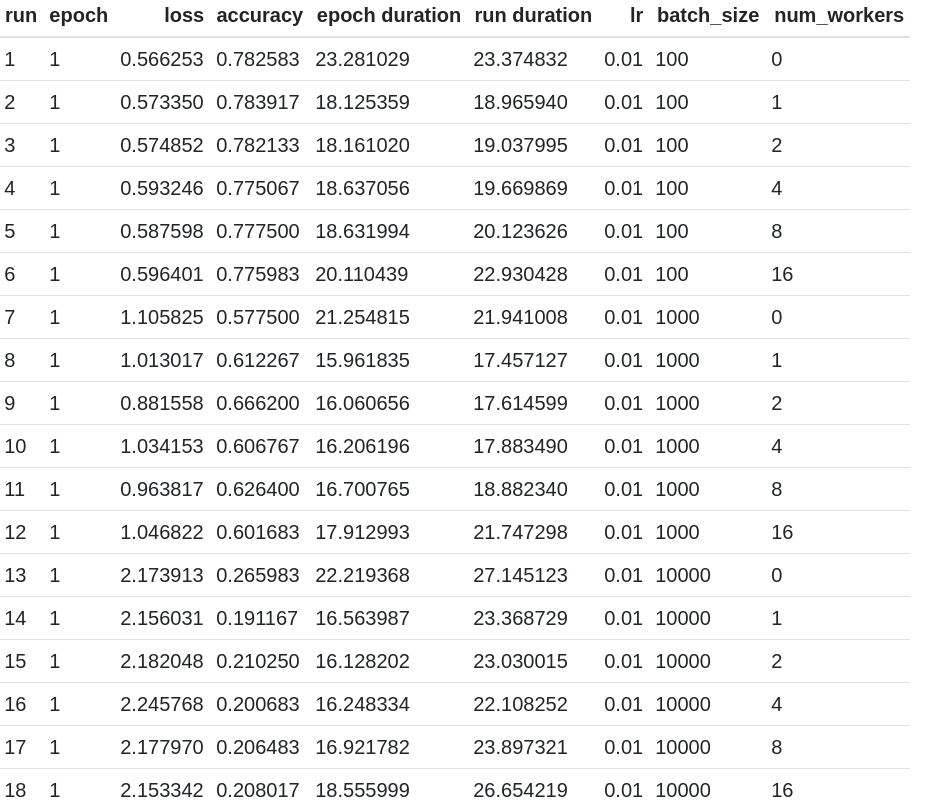

In [238]:
## Make It Go Faster With More Workers?

In [ ]:
params = OrderedDict(
    lr=[0.01],
    batch_size=[1000],
    num_workers=[1],
    device=["cuda"],
    trainset=["not_normal", "normal"],
)
m = RunManager()
for run in RunBuilder.get_runs(params):

    device = torch.device(run.device)
    network = Network().to(device)
    loader = DataLoader(
        trainsets[run.trainset], batch_size=run.batch_size, num_workers=run.num_workers
    )
    optimizer = optim.Adam(network.parameters(), lr=run.lr)

    m.begin_run(run, network, loader)
    for epoch in range(20):
        m.begin_epoch()
        for batch in loader:

            images = batch[0].to(device)
            labels = batch[1].to(device)
            preds = network(images)  # Pass Batch
            loss = F.cross_entropy(preds, labels)  # Calculate Loss
            optimizer.zero_grad()  # Zero Gradients
            loss.backward()  # Calculate Gradients
            optimizer.step()  # Update Weights

            m.track_loss(loss, batch)
            m.track_num_correct(preds, labels)
        m.end_epoch()
    m.end_run()
m.save("results")

### Using A GPU For Deep Learning

When we go to the GPU, we can use the `cuda()` method, and when we go to the CPU, we can use the `cpu()` method.


 
We can also use the to() method. To go to the GPU, we write `to('cuda')` and to go to the CPU, we write `to('cpu')`. The to() method is the preferred way mainly because it is more flexible. We'll see one example using using the first two, and then we'll default to always using the to() variant.

To make use of our GPU during the training process, there are two essential requirements. These requirements are as follows, the data must be moved to the GPU, and the network must be moved to the GPU.

- Data on the GPU
- Network on the GPU

By default, when a PyTorch tensor or a PyTorch neural network module is created, the corresponding data is initialized on the CPU.

In [3]:
t = torch.ones(1, 1, 28, 28)
network = Network()

In [4]:
t = t.cuda()
network = network.cuda()

In [5]:
gpu_pred = network(t)

In [6]:
gpu_pred.device

device(type='cuda', index=0)

In [7]:
t = t.cpu()
network = network.cpu()

cpu_pred = network(t)

In [8]:
cpu_pred.device

device(type='cpu')

The main takeaway at this point is that **our network and our data must both exist on the GPU in order to perform computations using the GPU, and this applies to any programming language or framework.**

In [9]:
t1 = torch.tensor([[1, 2], [3, 4]])

t2 = torch.tensor([[5, 6], [7, 8]])

In [10]:
t1.device, t2.device

(device(type='cpu'), device(type='cpu'))

In [11]:
t1 = t1.to("cuda")

In [12]:
t1.device

device(type='cuda', index=0)

Using the to() method is the preferred way of moving data to and from devices.
Also, note the reassignment. The operation is not in-place, and so the reassignment is required.

In [13]:
try:
    t1 + t2
except Exception as e:
    print(e)

Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!


In [14]:
try:
    t2 + t1
except Exception as e:
    print(e)

Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!


In [15]:
t2 = t2.to("cuda")

In [16]:
t1 + t2

tensor([[ 6,  8],
        [10, 12]], device='cuda:0')

In [17]:
network = Network()

In [18]:
for n, p in network.named_parameters():
    print(p.device, "", n)

cpu  conv1.weight
cpu  conv1.bias
cpu  conv2.weight
cpu  conv2.bias
cpu  fc1.weight
cpu  fc1.bias
cpu  fc2.weight
cpu  fc2.bias
cpu  out.weight
cpu  out.bias


An important consideration of this is that it explains why `nn.Module` instances like networks don't actually have a device. **It's not the network that lives on a device, but the tensors inside the network that live on a device.**

In [19]:
network.to("cuda")

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [20]:
for n, p in network.named_parameters():
    print(p.device, "", n)

cuda:0  conv1.weight
cuda:0  conv1.bias
cuda:0  conv2.weight
cuda:0  conv2.bias
cuda:0  fc1.weight
cuda:0  fc1.bias
cuda:0  fc2.weight
cuda:0  fc2.bias
cuda:0  out.weight
cuda:0  out.bias


Note here that **a reassignment was not required**. This is because the operation is in-place as far as the network instance is concerned. However, this operation can be used as a reassignment operation. This is preferred for consistency between nn.Module instances and PyTorch tensors.

Since our network is on the GPU and this newly created sample is on the CPU by default, we are getting an error. 

In [21]:
sample = torch.ones(1, 1, 28, 28)

In [22]:
try:
    network(sample)
except Exception as e:
    print(e)

Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same


In [23]:
try:
    pred = network(sample.to("cuda"))
    print(pred)
except Exception as e:
    print(e)

tensor([[ 0.0281, -0.1246, -0.1031, -0.0712, -0.0238,  0.0654, -0.0215, -0.0827,
         -0.0752,  0.0901]], device='cuda:0', grad_fn=<AddmmBackward>)


### Writing Device Agnostic PyTorch Code
Remember earlier when we saw the cuda() and cpu() methods?

We'll, one of the reasons that the `to()` method is preferred, is because the `to()` method is parameterized, and this makes it easier to alter the device we are choosing, i.e. it's flexible!

In [24]:
torch.cuda.is_available()

True

Refactoring The `RunManager` Class

Before we update the training loop, we need to update the RunManager class. Inside the begin_run() method we need to modify the device of the images tensor that is passed to add_graph method.

```
def begin_run(self, run, network, loader):

    self.run_start_time = time.time()

    self.run_params = run
    self.run_count += 1

    self.network = network
    self.loader = loader
    self.tb = SummaryWriter(comment=f'-{run}')

    images, labels = next(iter(self.loader))
    grid = torchvision.utils.make_grid(images)

    self.tb.add_image('images', grid)
    self.tb.add_graph(
            self.network
        ,images.to(getattr(run, 'device', 'cpu'))
    )
```

we are using the getattr() built in function to get the value of the device on the run object. If the run object doesn't have a device, then cpu is returned. This makes the code backward compatible. It will still work if we don't specify a device for our run.

**Note that the network doesn't need to be moved to a device because it's device was set before being passed in. However, the images tensor is obtained from the loader.**

In [25]:
## Refactoring The Training Loop

In [29]:
params = OrderedDict(
    lr=[0.01],
    batch_size=[1000, 10000, 20000],
    num_workers=[0, 1],
    device=["cuda", "cpu"],
)

## Normalize A Dataset In Code

In [30]:
train_set = torchvision.datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()]),
)

PyTorch allows us to normalize our dataset using the standardization process we've just seen by passing in the mean and standard deviation values for each color channel to the `Normalize()` transform.

```
torchvision.transforms.Normalize(
      [meanOfChannel1, meanOfChannel2, meanOfChannel3] 
    , [stdOfChannel1, stdOfChannel2, stdOfChannel3] 
)
```

In [32]:
# Calculating mean And std The Easy Way
loader = DataLoader(train_set, batch_size=len(train_set), num_workers=1)
data = next(iter(loader))
print(data[0].mean(), data[0].std())

tensor(0.2860) tensor(0.3530)


Note that the  is the height and width of the images inside our dataset. Now, we sum the pixels values by iterating over each batch, and we calculate the mean by dividing this sum by the total number of pixels.

In [34]:
# Calculating mean And std The Hard Way
loader = DataLoader(train_set, batch_size=1000, num_workers=1)
num_of_pixels = len(train_set) * 28 * 28

total_sum = 0
for batch in loader:
    total_sum += batch[0].sum()
mean = total_sum / num_of_pixels

sum_of_squared_error = 0
for batch in loader:
    sum_of_squared_error += ((batch[0] - mean).pow(2)).sum()
std = torch.sqrt(sum_of_squared_error / num_of_pixels)
print(mean, std)

tensor(0.2860) tensor(0.3530)


In [35]:
## Using The mean And std Values

In [36]:
train_set_normal = torchvision.datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize(mean, std)]
    ),
)

Note that the order of the transforms matters inside the composition. The images are loaded as Python PIL objects, so we must add the `ToTensor()` transform before the Normalize() transform due to the fact that the Normalize() transform expects a tensor as input.

Now, that our dataset has a Normalize() transform, the data will be normalized when it is loaded by the data loader. Remember, for each image the following transform will be applied to every pixel in the image.

In [37]:
loader = DataLoader(train_set_normal, batch_size=len(train_set), num_workers=1)
data = next(iter(loader))
data[0].mean(), data[0].std()

(tensor(-9.3670e-08), tensor(1.))

Let's see now how training with and without normalized data affects the training process. To this test, we'll do  epochs under each condition.

In [38]:
trainsets = {"not_normal": train_set, "normal": train_set_normal}

In [44]:
params = OrderedDict(
    lr=[0.01],
    batch_size=[1000],
    num_workers=[1],
    device=["cuda"],
    trainset=["not_normal", "normal"],
)

m = RunManager()
for run in RunBuilder.get_runs(params):

    device = torch.device(run.device)
    network = Network().to(device)
    loader = DataLoader(
        trainsets[run.trainset], batch_size=run.batch_size, num_workers=run.num_workers
    )
    optimizer = optim.Adam(network.parameters(), lr=run.lr)

    m.begin_run(run, network, loader)
    for epoch in range(5):
        m.begin_epoch()
        for batch in loader:

            images = batch[0].to(device)
            labels = batch[1].to(device)
            preds = network(images)  # Pass Batch
            loss = F.cross_entropy(preds, labels)  # Calculate Loss
            optimizer.zero_grad()  # Zero Gradients
            loss.backward()  # Calculate Gradients
            optimizer.step()  # Update Weights

            m.track_loss(loss, batch)
            m.track_num_correct(preds, labels)
        m.end_epoch()
    m.end_run()
m.save("results")

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
0,1,1,1.131055,0.567850,5.959719,6.719997,0.01,1000,1,cuda,not_normal
1,1,2,0.576420,0.776800,5.338357,12.220619,0.01,1000,1,cuda,not_normal
2,1,3,0.473609,0.822717,5.200122,17.571576,0.01,1000,1,cuda,not_normal
3,1,4,0.419546,0.845100,5.326866,23.033386,0.01,1000,1,cuda,not_normal
4,1,5,0.383614,0.857867,5.745014,28.921343,0.01,1000,1,cuda,not_normal
5,2,1,0.839150,0.683400,8.798169,9.598358,0.01,1000,1,cuda,normal
6,2,2,0.452007,0.828817,8.865660,18.592048,0.01,1000,1,cuda,normal
7,2,3,0.386529,0.856633,8.712248,27.431260,0.01,1000,1,cuda,normal
8,2,4,0.341688,0.873650,8.734676,36.297586,0.01,1000,1,cuda,normal
9,2,5,0.315031,0.883583,9.176489,45.620417,0.01,1000,1,cuda,normal


In [45]:
pd.DataFrame.from_dict(m.run_data).sort_values("accuracy", ascending=False)

,run,epoch,loss,accuracy,epoch duration,run duration,lr,batch_size,num_workers,device,trainset
9,2,5,0.315031,0.883583,9.176489,45.620417,0.01,1000,1,cuda,normal
8,2,4,0.341688,0.873650,8.734676,36.297586,0.01,1000,1,cuda,normal
4,1,5,0.383614,0.857867,5.745014,28.921343,0.01,1000,1,cuda,not_normal
7,2,3,0.386529,0.856633,8.712248,27.431260,0.01,1000,1,cuda,normal
3,1,4,0.419546,0.845100,5.326866,23.033386,0.01,1000,1,cuda,not_normal
6,2,2,0.452007,0.828817,8.865660,18.592048,0.01,1000,1,cuda,normal
2,1,3,0.473609,0.822717,5.200122,17.571576,0.01,1000,1,cuda,not_normal
1,1,2,0.576420,0.776800,5.338357,12.220619,0.01,1000,1,cuda,not_normal
5,2,1,0.839150,0.683400,8.798169,9.598358,0.01,1000,1,cuda,normal
0,1,1,1.131055,0.567850,5.959719,6.719997,0.01,1000,1,cuda,not_normal


## PyTorch Sequential Module

The `Sequential` class allows us to build PyTorch neural networks on-the-fly without having to build an explicit class. This make it much easier to rapidly build networks and allows us to skip over the step where we implement theforward() method. When we use the sequential way of building a PyTorch network, we construct the forward() method implicitly by defining our network's architecture sequentially.

A sequential module is a container or wrapper class that extends the `nn.Module` base class and allows us to compose modules together. We can compose any nn.Module with in any other nn.Module.


This means that we can compose layers to make networks, and since networks are also nn.Module instances, we can also compose networks with one another. Additionally, since the Sequential class is also a nn.Module itself, we can even compose Sequential modules with one another.

In [46]:
### Building PyTorch Sequential Networks

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import math

from collections import OrderedDict

torch.set_printoptions(linewidth=150)

In [79]:
train_set = torchvision.datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()]),
)

In [80]:
image, label = train_set[0]
image.shape

torch.Size([1, 28, 28])

In [81]:
in_features = image.numel()

In [56]:
in_features

784

In [51]:
out_features = math.floor(in_features / 2)

In [53]:
out_features

392

In [52]:
out_classes = len(train_set.classes)

In [54]:
out_classes

10

In [58]:
# Sequential Model Initialization: Way 1

network1 = nn.Sequential(
    nn.Flatten(start_dim=1),
    nn.Linear(in_features, out_features),
    nn.Linear(out_features, out_classes),
)

# Sequential Model Initialization: Way 2

layers = OrderedDict(
    [
        ("flat", nn.Flatten(start_dim=1)),
        ("hidden", nn.Linear(in_features, out_features)),
        ("output", nn.Linear(out_features, out_classes)),
    ]
)

network2 = nn.Sequential(layers)

# Sequential Model Initialization: Way 3
network3 = nn.Sequential()
network3.add_module("flat", nn.Flatten(start_dim=1))
network3.add_module("hidden", nn.Linear(in_features, out_features))
network3.add_module("output", nn.Linear(out_features, out_classes))

### Class Definition Vs Sequential

In [85]:
torch.manual_seed(50)


class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 12, 5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):

        t = F.relu(self.conv1(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        t = F.relu(self.conv2(t))
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        t = t.flatten(start_dim=1)
        t = F.relu(self.fc1(t))
        t = F.relu(self.fc2(t))
        t = self.out(t)

        return t


network = Network()

In [86]:
torch.manual_seed(50)
sequential = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(start_dim=1),
    nn.Linear(in_features=12 * 4 * 4, out_features=120),
    nn.ReLU(),
    nn.Linear(in_features=120, out_features=60),
    nn.ReLU(),
    nn.Linear(in_features=60, out_features=10),
)

Note that we can get the same output predictions for these two networks if we fix the seed that is used to generate random numbers in PyTorch. This is because both network's will have randomly generated weights. To be sure the weights are the same, we use the PyTorch method below before creating each network.

In [82]:
image = image.unsqueeze(0)

In [87]:
image.shape

torch.Size([1, 1, 28, 28])

In [88]:
network(image), sequential(image)

(tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>),
 tensor([[-0.0957,  0.1053, -0.1055,  0.1547, -0.0366, -0.0132,  0.0749, -0.1152,  0.0426,  0.0639]], grad_fn=<AddmmBackward>))

To be sure the weights are the same, we use the PyTorch method below before creating each network.

`torch.manual_seed(50)`

It's important to note that the method must be called twice, once before each network initialization.

**batch normalization** we are normalizing the data again after it has passed through one or more layers.

When using batch norm, the mean and standard deviation values are calculated with respect to the batch at the time normalization is applied. This is opposed to the entire dataset, like we saw with dataset normalization.

In [89]:
torch.manual_seed(50)
network1 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(start_dim=1),
    nn.Linear(in_features=12 * 4 * 4, out_features=120),
    nn.ReLU(),
    nn.Linear(in_features=120, out_features=60),
    nn.ReLU(),
    nn.Linear(in_features=60, out_features=10),
)

In [90]:
torch.manual_seed(50)
network2 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.BatchNorm2d(6),
    nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(start_dim=1),
    nn.Linear(in_features=12 * 4 * 4, out_features=120),
    nn.ReLU(),
    nn.BatchNorm1d(120),
    nn.Linear(in_features=120, out_features=60),
    nn.ReLU(),
    nn.Linear(in_features=60, out_features=10),
)

In [91]:
networks = {"no_batch_norm": network1, "batch_norm": network2}

In [92]:
params = OrderedDict(
    lr=[0.01],
    batch_size=[1000],
    num_workers=[1],
    device=["cuda"],
    trainset=["normal"],
    network=list(networks.keys()),
)